In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne(adc_valon='/dev/ttyUSB0')

In [4]:
ri.initialize(use_config=False)

Reinitializing system
Deprogramming
Programming iq2xpfb14mcr7_2015_Nov_25_0907.bof
Requested sampling rate 512.0 MHz. Estimated sampling rate 512.9 MHz
starting udp server process on PPC
ssh root@roach "nohup /boffiles/udp/kid_ppc 3189 < /dev/null &> /dev/null &"


In [5]:
ri.set_lo(1500.)

In [192]:
ri.set_tone_freqs(np.array([1564.]),nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1564.])

In [66]:
ri.set_tone_baseband_freqs(np.array([64.]),nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 64.])

In [140]:
ri.set_tone_bins(np.arange(-16,16,4)+4096*16,nsamp=16*2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [141]:
ri.fft_bins = ri.calc_fft_bins(ri.tone_bins,ri.tone_nsamp)

In [142]:
ri.fft_bins

array([[2048, 2048, 2048, 2048, 2048, 2048, 2048, 2048]])

In [143]:
ri.select_bank(0)

In [144]:
ri.select_fft_bins([0])

In [145]:
ri.fpga_fft_readout_indexes

array([2048])

In [146]:
ri.tone_bins

array([[65520, 65524, 65528, 65532, 65536, 65540, 65544, 65548]])

In [147]:
ri._sync()

In [18]:
ri.set_dac_atten(20)

In [127]:
x,y = ri.get_raw_adc()

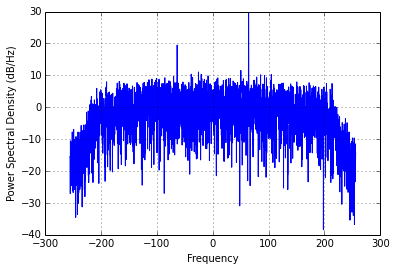

In [128]:
blah = psd(x+1j*y,Fs=512.,NFFT=8192/2)

In [129]:
ri.r.write_int('sync',2)

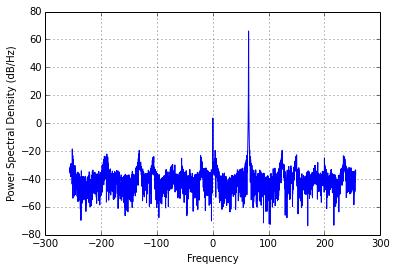

In [130]:
x,y = ri.get_raw_adc()
blah = psd(x+1j*y,Fs=512.,NFFT=8192/2)
#gca().axvline(64)

In [28]:
def get_snap(loopback=False):
    ri.r.write_int('fftout_ctrl',0)
    ri.r.write_int('fftout_ctrl',1)
    ri._sync(loopback=loopback)
    while ri.r.read_int('fftout_status') != 0x8000:
        pass
    return np.fromstring(ri.r.read('fftout_bram',2**15),dtype='>i2').astype('float').view('complex')

In [63]:
ri.set_fft_gain(0)

In [131]:
d = get_snap(loopback=True)
d2 = get_snap(loopback=False)

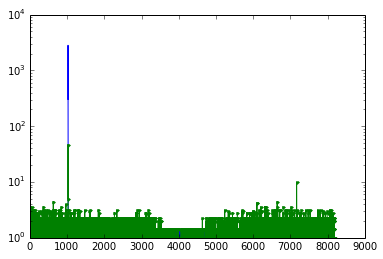

In [132]:
plot(np.abs(d))
plot(np.abs(d2),'.-')
yscale('log')

(63.9, 64.1)

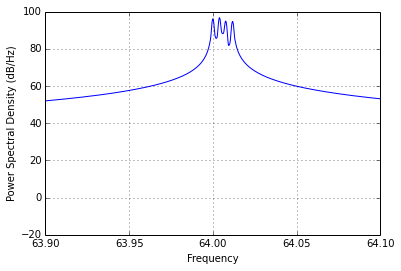

In [93]:
blah = psd(ri.q_iwave*1j+ri.q_rwave,NFFT=2**21,Fs=512.)
xlim(63.9,64.1)

In [263]:
ri.fpga_fft_readout_indexes

array([14336])

In [264]:
ri.fft_bins

array([[2048]])

In [40]:
np.abs(d).argmax()

7168

In [103]:
ri.fpga_fft_readout_indexes

array([14336])

In [104]:
14336/2

7168

In [43]:
8192-2048/2

7168

In [22]:
d = np.fromstring(ri.r.snapshot_get('fftout',man_trig=True)['data'],dtype='>i2').astype('float').view('complex')

In [32]:
d.shape[0]*4

32768

In [30]:
'%08x' %ri.r.read_int('fftout_status')

'00008000'

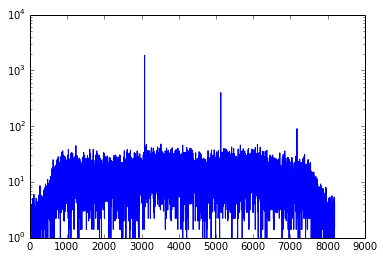

In [27]:
semilogy(np.abs(d))

In [53]:
ri.fft_bins

array([[2048]])

In [ ]:
ri.fft_bins[0,0] = 
ri.select_fft_bins([0])
d,addr = ri.get_data(2,demod=False)


In [117]:
d,addr = ri.get_data(4,demod=False)
#dmod,addr = ri.get_data(2)

In [241]:
d.shape

(8192, 1)

In [225]:
ri.phases

array([ 4.90884732])

(-500, 500)

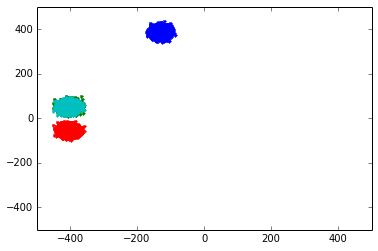

In [233]:
plot(d.real,d.imag,'.')
plot(dmod.real,dmod.imag,'.')
dm2 = d*np.exp(-1j*ri.phases[0])
dm3 = ri.demodulate_data(d)
plot(dm2.real,dm2.imag,'.')
plot(dm3.real,dm3.imag,'.')
xlim(-500,500)
ylim(-500,500)

In [234]:
dmod.dtype

dtype('complex64')

In [235]:
dm2.dtype

dtype('complex64')

In [236]:
dm3.dtype

dtype('complex64')

In [230]:
kid_readout.roach.heterodyne.tone_offset_frequency(ri.tone_bins,ri.tone_nsamp,ri.fft_bins,ri.nfft)

array([[ 0.]])

In [232]:
ri.demodulator.compute_pfb_response(0)

1.0

In [148]:
ri.r.write_int('sync',2)
d,addr = ri.get_data(4,demod=False)

(45.879216850916194, 56.879216850916194)

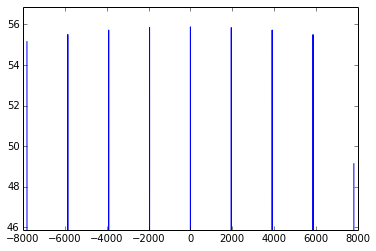

In [151]:
pxx,fr = mlab.psd(d[:,0],NFFT=8192,Fs=256e6/2**14)
#xlim(-2000,2000)
db = 10*np.log10(pxx)
plot(fr,db)
ylim(db.max()-10,db.max()+1)

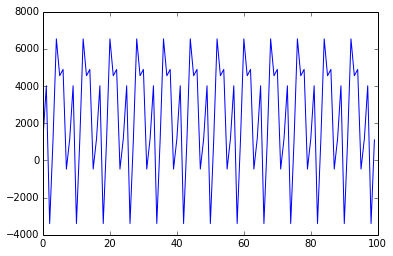

In [114]:
plot(d.real[:100])

In [6]:
import kid_readout.utils.sweeps

In [33]:
ri.set_lo(1300)

In [34]:
frqs = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-16,16)*16+ri.lo_frequency,16*np.arange(-32,32)/64.,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [35]:
ri.set_dac_atten(30)

In [35]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 1.6 3.1 4.7 6.2 7.8 9.4 10.9 12.5 14.1 15.6 detected mcnt overflow None 835849 0 65536 0 240 835849
17.2 18.8 20.3 21.9 23.4 25.0 26.6 28.1 29.7 31.2 32.8 34.4 35.9 37.5 39.1 40.6 42.2 43.8 45.3 46.9 48.4 50.0 51.6 53.1 54.7 56.2 57.8 59.4 60.9 62.5 64.1 65.6 67.2 68.8 70.3 71.9 73.4 75.0 76.6 78.1 79.7 81.2 82.8 84.4 85.9 87.5 89.1 90.6 92.2 93.8 95.3 96.9 98.4


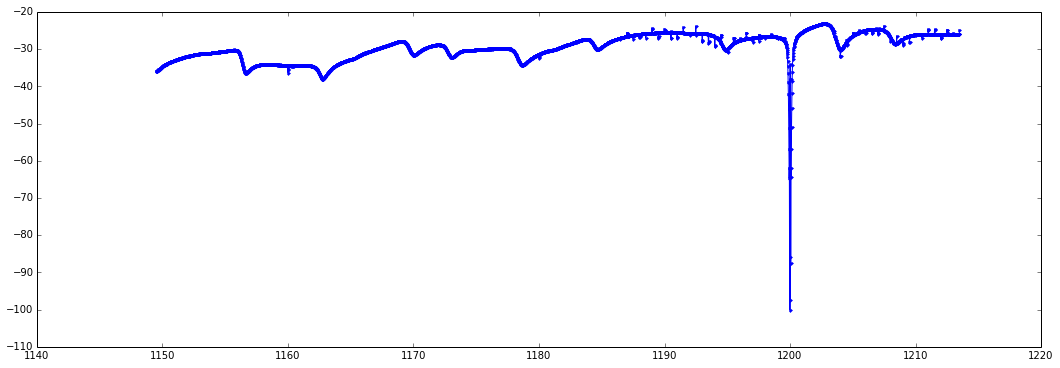

In [32]:
figure(figsize=(18,6))
plot(swp.freqs,20*np.log10(np.abs(swp.data)),'.-')
#xlim(1150,1250)
#ylim(-70,-50)

In [9]:
frqs = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(64)+1150.,np.arange(-32,32)/64.,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [49]:
ri.fft_bins

array([[14768, 14800, 14832, ...,   336,   368,   400],
       [14768, 14800, 14832, ...,   336,   368,   400],
       [14769, 14801, 14833, ...,   337,   369,   401],
       ..., 
       [14798, 14830, 14862, ...,   366,   398,   430],
       [14799, 14831, 14863, ...,   367,   399,   431],
       [14800, 14832, 14864, ...,   368,   400,   432]])

In [10]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 0.8 1.6 2.3 3.1 3.9 4.7 5.5 6.2 7.0 7.8 8.6 9.4 10.2 10.9 11.7 12.5 13.3 14.1 14.8 15.6 16.4 17.2 18.0 18.8 19.5 20.3 21.1 21.9 22.7 23.4 24.2 25.0 25.8 26.6 27.3 28.1 28.9 29.7 30.5 31.2 32.0 32.8 33.6 34.4 35.2 35.9 36.7 37.5 38.3 39.1 39.8 40.6 41.4 42.2 43.0 43.8 44.5 45.3 46.1 46.9 47.7 48.4 49.2 50.0 50.8 detected mcnt overflow None 573778 0 65536 0 144 573778
51.6 52.3 53.1 53.9 54.7 55.5 56.2 57.0 57.8 58.6 59.4 60.2 60.9 61.7 62.5 63.3 64.1 64.8 65.6 66.4 67.2 68.0 68.8 69.5 70.3 71.1 71.9 72.7 73.4 74.2 75.0 75.8 detected mcnt overflow None 393558 0 65536 0 208 393558
76.6 77.3 78.1 78.9 79.7 80.5 81.2 82.0 82.8 83.6 84.4 85.2 85.9 86.7 87.5 88.3 89.1 89.8 90.6 91.4 92.2 93.0 93.8 94.5 95.3 96.1 96.9 97.7 98.4 99.2


(-50, -20)

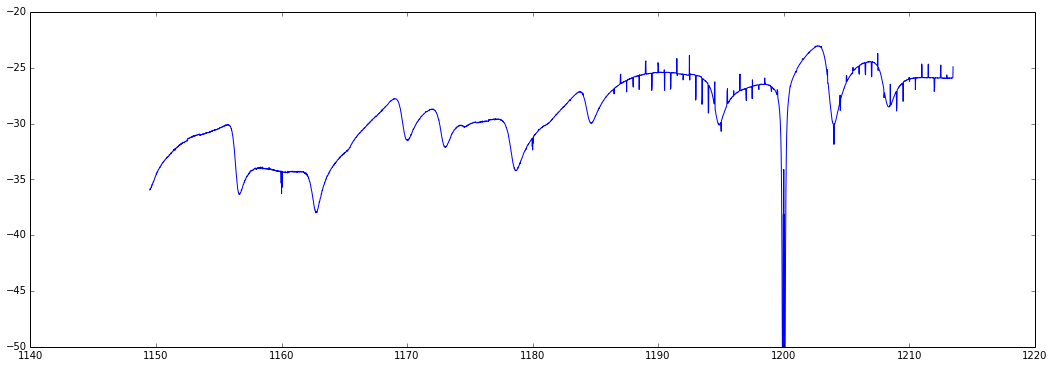

In [17]:
figure(figsize=(18,6))
plot(swp.freqs,20*np.log10(np.abs(swp.data)))
#xlim(1150,1250)
ylim(-50,-20)

(-1, 1)

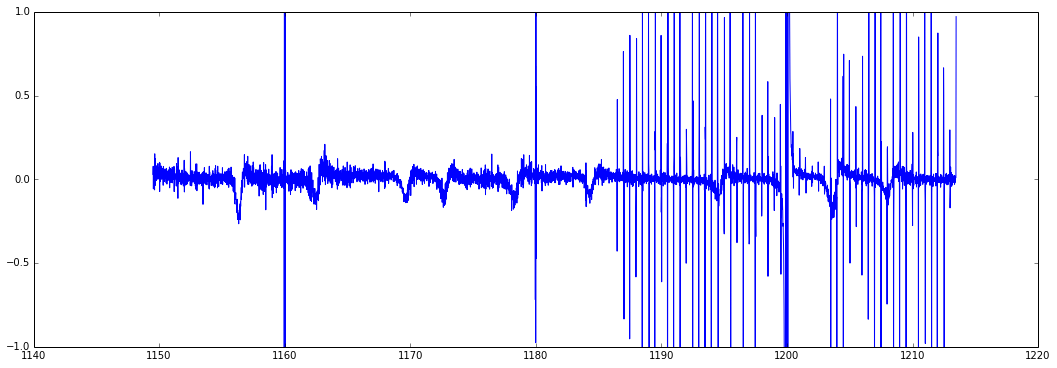

In [19]:
figure(figsize=(18,6))
plot(swp.freqs[:-1],np.diff(20*np.log10(np.abs(swp.data))))
ylim(-1,1)

In [41]:
256e6/2**14

15625.0

In [42]:
1/64.

0.015625

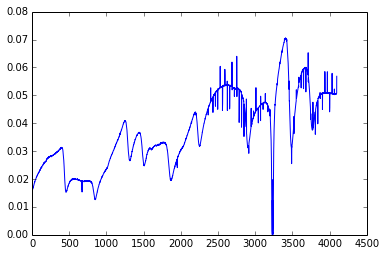

In [20]:
plot(np.abs(swp.data))

In [21]:
s21c = swp.data*np.exp(-2j*np.pi*swp.freqs*31.302)

(1, 3)

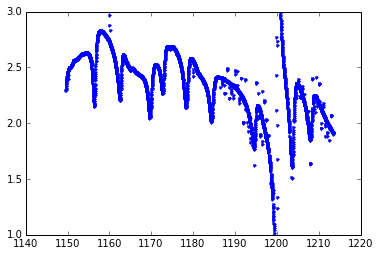

In [23]:
plot(swp.freqs,np.angle(s21c),'.')
#xlim(1150,1170)
ylim(1,3)


(-0.05, 0.05)

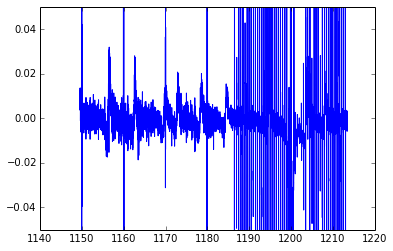

In [30]:
plot(swp.freqs[:-1],np.diff(np.angle(s21c)),)
ylim(-.05,.05)

In [262]:
frqs = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-256,256)+ri.lo_frequency,np.arange(-32,32)[1::2]/64.,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [409]:
512e6/2**14/8

3906.25

In [61]:
frqs = kid_readout.utils.sweeps.prepare_sweep(ri,np.arange(-16,16)+ri.lo_frequency+40,np.arange(-32,32)/64.+512./2**14/8,nsamp=2**18)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [279]:
np.arange(-32,32)[1::2]+31

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62])

(-1, 65)

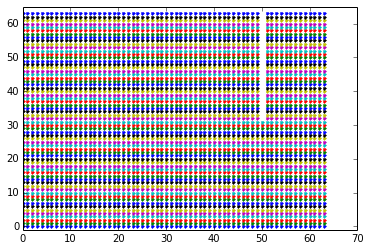

In [55]:
blah = plot(ri.tone_bins.T-ri.tone_bins[0][:,None],'.')
ylim(-1,65)

In [62]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 1.6 3.1 4.7 6.2 7.8 9.4 10.9 12.5 14.1 15.6 detected mcnt overflow None 156875 0 65536 0 16 156875
17.2 18.8 20.3 21.9 23.4 25.0 26.6 28.1 29.7 31.2 32.8 34.4 35.9 37.5 39.1 40.6 42.2 43.8 45.3 46.9 48.4 50.0 51.6 53.1 54.7 56.2 57.8 59.4 60.9 62.5 64.1 65.6 67.2 68.8 70.3 71.9 73.4 75.0 76.6 78.1 79.7 81.2 82.8 84.4 85.9 87.5 89.1 90.6 92.2 93.8 95.3 96.9 98.4


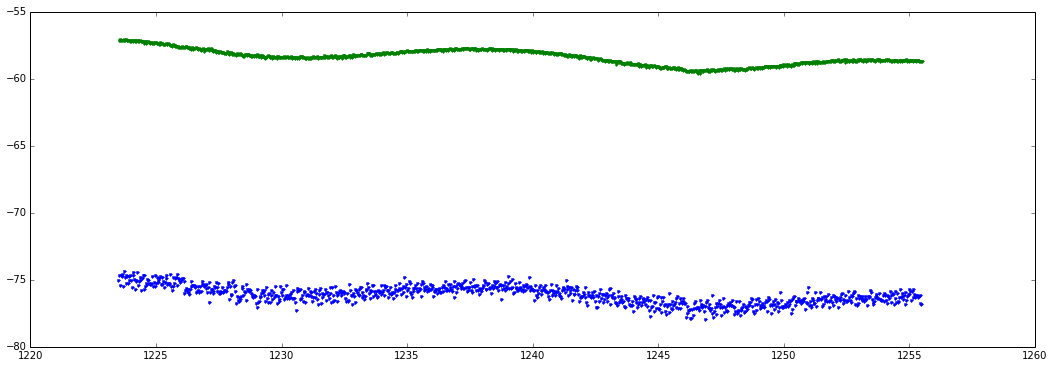

In [63]:
figure(figsize=(18,6))
plot(swp.freqs[::2],20*np.log10(np.abs(swp.data[::2])),'.')
plot(swp.freqs[1::2],20*np.log10(np.abs(swp.data[1::2])),'.')
#xlim(1246,1254)
#ylim(-60,-50)

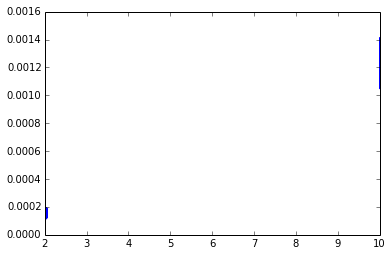

In [74]:
plot([blk.tone % 16 for blk in swp.blocks],np.abs(swp.data),'.')
#xlim(800,804)

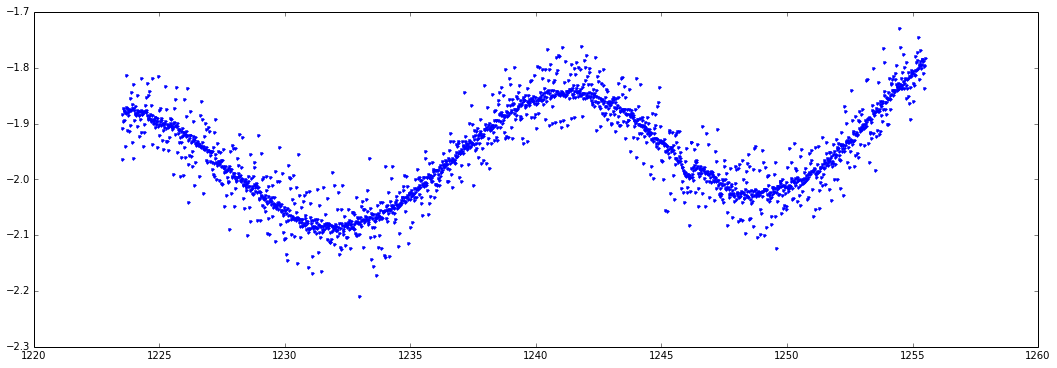

In [64]:
figure(figsize=(18,6))
s21c = swp.data*np.exp(-2j*np.pi*swp.freqs*31.2992)
plot(swp.freqs,np.angle(s21c),'.')
#xlim(1230,1235)
#ylim(-2.3,-2.2)

In [56]:
[blk.tone for blk in swp.blocks[:8]]

[29536, 29537, 29538, 29539, 29540, 29541, 29542, 29543]

In [57]:
[blk.fftbin for blk in swp.blocks[:8]]

[14769, 14769, 14770, 14771, 14771, 14771, 14772, 14773]

In [58]:
[blk.tone-2*(blk.fftbin-1) for blk in swp.blocks[:8]]

[0, 1, 0, -1, 0, 1, 0, -1]

In [282]:
blk = swp.blocks[0]

In [ ]:
blk.data

In [284]:
len(swp.blocks)

16384

(0, 10)

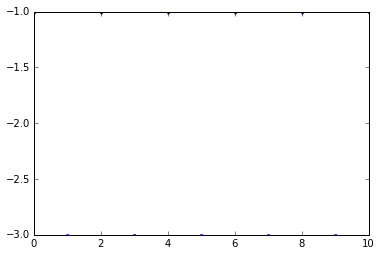

In [291]:
plot([blk.tone-2*blk.fftbin for blk in swp.blocks],'.')
xlim(0,10)

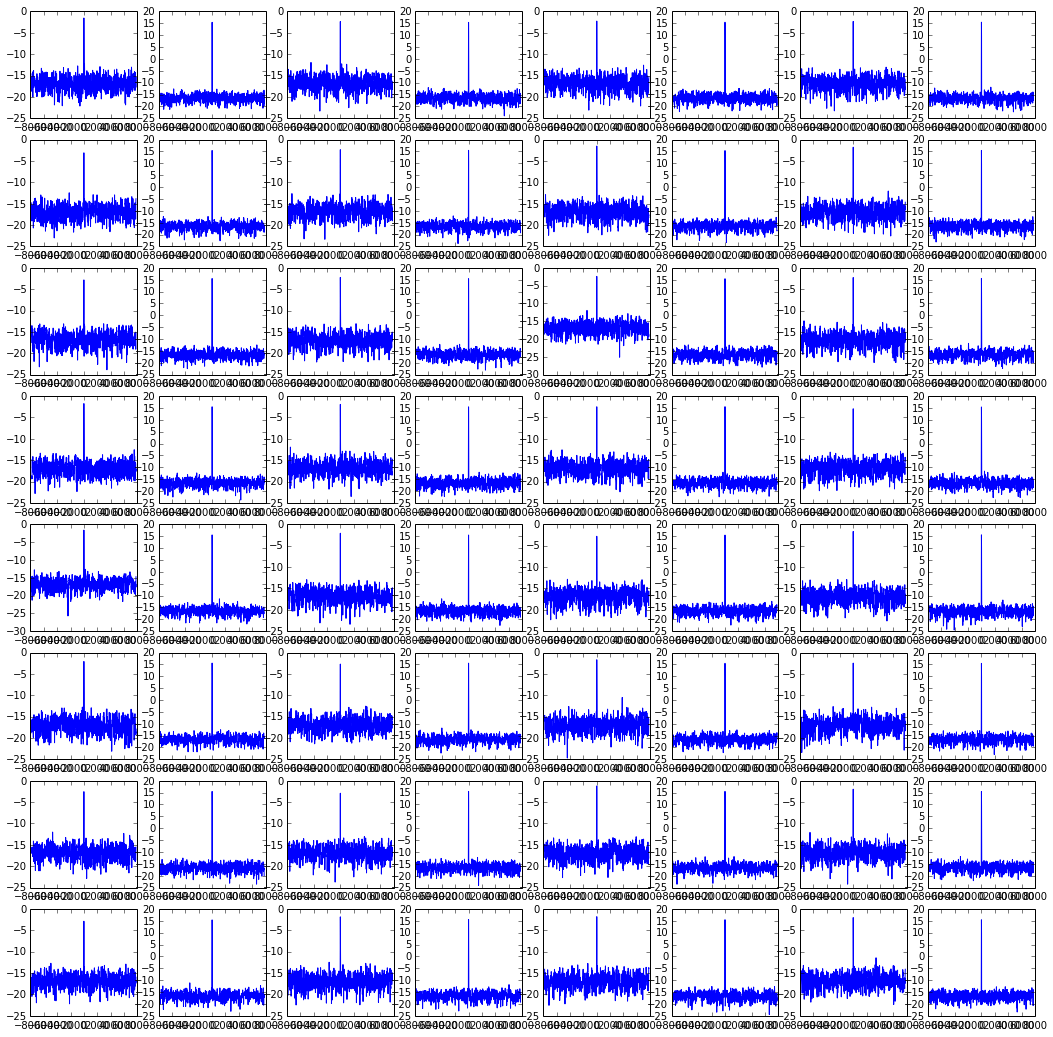

In [75]:
fig,axs=plt.subplots(8,8,figsize=(18,18))
for k in range(64):
    ax = axs.flatten()[k]
    pxx,fr = mlab.psd(swp.blocks[500+k].data,Fs=256e6/2**14,NFFT=1024)
    ax.plot(fr,10*np.log10(pxx))

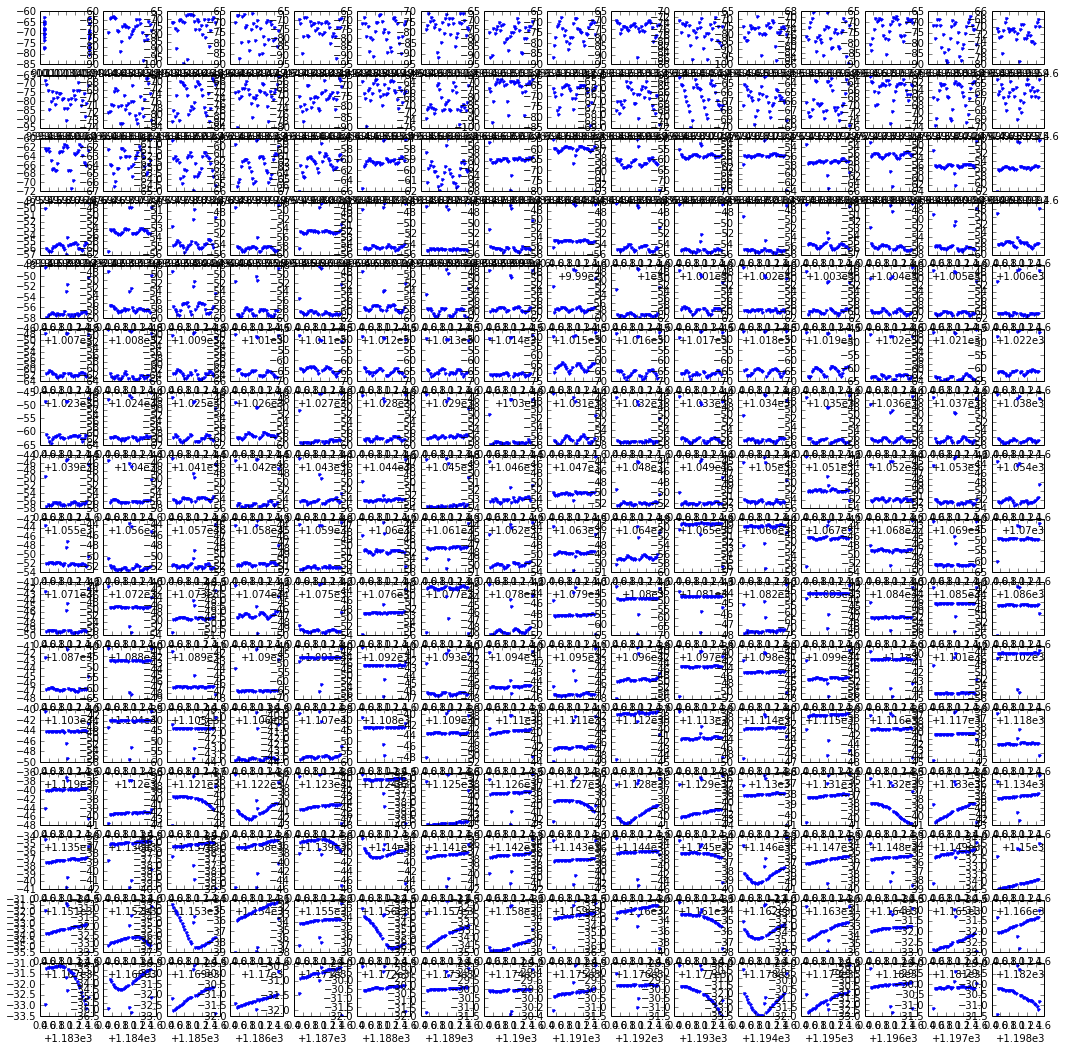

In [281]:
fig,axs=plt.subplots(16,16,figsize=(18,18))
for k in range(256):
    ax = axs.flatten()[k]
    fr,s21,err = swp.select_index(k)
    s21c = s21*np.exp(-2j*np.pi*fr*31.296)
#    plot(fr,(np.angle(s21c)))
#    print np.angle(s21c).ptp()
    ax.plot(fr,20*np.log10(np.abs(s21c)),'.')
    #ax.set_ylim(-50,-25)

In [336]:
ri.set_tone_freqs(np.array([1352.41]),nsamp=2**16)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1352.40625])

In [304]:
import kid_readout.equipment.hittite_controller

In [305]:
hc = kid_readout.equipment.hittite_controller.hittiteController(addr='192.168.0.200')

In [311]:
hc.set_freq(12.5e9)

In [307]:
hc.set_power(0)

In [308]:
hc.on()

In [337]:
ri.set_modulation_output(7)

122.0703125

In [341]:
d,addr = ri.get_data(64)

In [340]:
ri.set_dac_atten(20)

In [302]:
d.shape

(262144, 1)

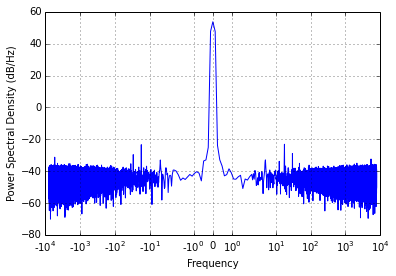

In [342]:
blah = psd(d[:,0],NFFT=2**17,Fs=256e6/2**14)
xscale('symlog')

In [348]:
ri.tone_bins*8

array([[156064]])

In [346]:
ri.tone_nsamp

65536

In [347]:
2**15*16

524288

In [355]:
import time

In [361]:
(np.array([156064])[None,:]+np.arange(32)[:,None]).shape

(32, 1)

In [362]:
ri.set_tone_bins((np.array([156064])[None,:]+np.arange(32)[:,None]), nsamp=2**19)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [370]:
ri.fft_bins = ri.calc_fft_bins(ri.tone_bins,ri.tone_nsamp)

0 [4877]
1 [4877]
2 [4877]
3 [4877]
4 [4877]
5 [4877]
6 [4877]
7 [4877]
8 [4877]
9 [4877]
10 [4877]
11 [4877]
12 [4877]
13 [4877]
14 [4877]
15 [4877]
16 [4878]
17 [4878]
18 [4878]
19 [4878]
20 [4878]
21 [4878]
22 [4878]
23 [4878]
24 [4878]
25 [4878]
26 [4878]
27 [4878]
28 [4878]
29 [4878]
30 [4878]
31 [4878]


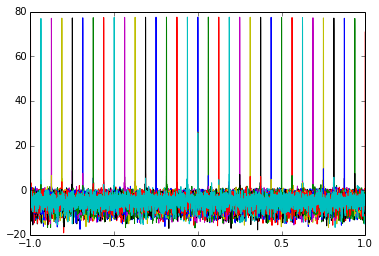

In [371]:

for k in range(32):
    ri.bank=k
    ri.select_fft_bins([0])
    ri.select_bank(k)
    print k, ri.fpga_fft_readout_indexes
    ri._sync()
    time.sleep(1)
    d,addr = ri.get_data(4,demod=False)
    pxx,fr = mlab.psd(d[:,0],NFFT=d.shape[0]/4)
    plot(fr,10*np.log10(pxx))

In [390]:
ri.select_bank(17)

In [391]:
ri.fft_bins[17,0]

4878

4876 -2 67.7537474989
4877 -1 79.7137939224
4878 0 79.9241820973
4879 1 69.1266528559
4880 2 30.3526274128


(-1, -0.8)

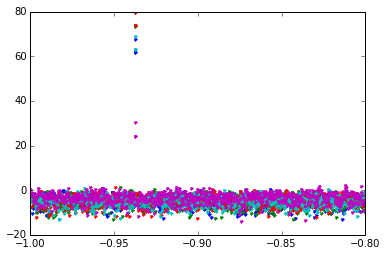

In [395]:
b0 = 4878
for offset in range(-2,3):
    ri.fft_bins[17,0] = b0+offset
    ri.select_fft_bins([0])
    time.sleep(1)
    d,addr = ri.get_data(8,demod=False)
    pxx,fr = mlab.psd(d[:,0],NFFT=8192)
    plot(fr,10*np.log10(pxx),'.')
    print b0+offset,offset,10*np.log10(pxx).max()
xlim(-1,-.8)

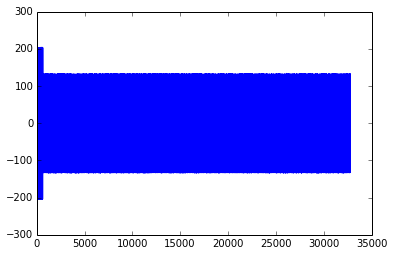

In [381]:
plot(d[:,0].real)

In [374]:
d,addr = ri.get_data(8,demod=False)

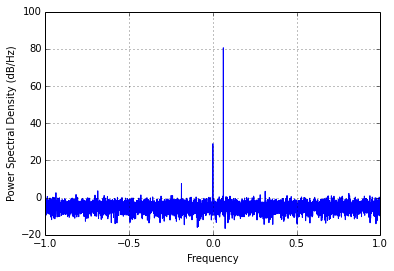

In [375]:
blah = psd(d[:,0],NFFT=8192)

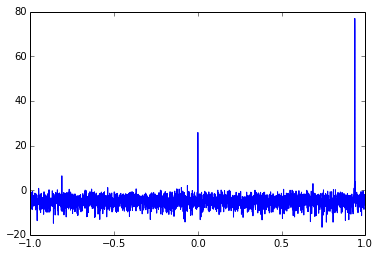

In [359]:
pxx,fr = mlab.psd(d[:,0],NFFT=d.shape[0]/4)
plot(fr,10*np.log10(pxx))

In [352]:
'%08x' %ri.r.read_int('fftshift')

'000fffff'

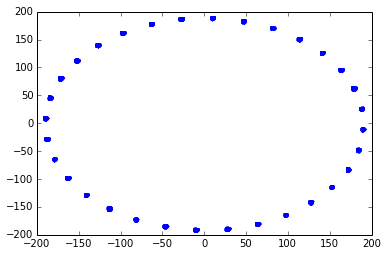

In [357]:
plot(d.real,d.imag,'.')

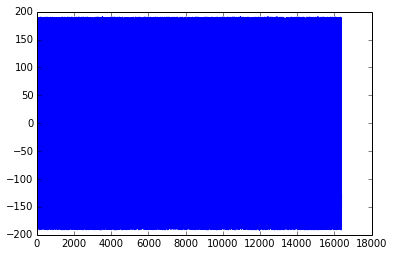

In [358]:
plot(d.real)